# Correlation Results Analysis

This notebook analyzes the results of the instrument correlation analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Set plot style
sns.set_theme(style="whitegrid")

## 0. Merge Results

Merge all CSV result files into a single file.

In [ ]:
def merge_csvs():
    results_dir = 'results'
    output_file = os.path.join(results_dir, 'combined_correlation_results.csv')
    
    # Find all CSV files in the results directory
    csv_files = glob.glob(os.path.join(results_dir, '*.csv'))
    
    # Exclude the output file itself if it already exists
    csv_files = [f for f in csv_files if f != output_file]
    
    if not csv_files:
        print("No CSV files found to merge.")
        return

    print(f"Found {len(csv_files)} CSV files to merge.")
    
    dfs = []
    for file in csv_files:
        try:
            # Read CSV, handling potential errors like empty files or bad lines
            # Using on_bad_lines='skip' to avoid crashing on malformed rows
            df = pd.read_csv(file, on_bad_lines='skip')
            
            # Add a column for the source filename, useful for debugging
            df['source_file'] = os.path.basename(file)
            
            dfs.append(df)
            print(f"Loaded {len(df)} rows from {file}")
        except Exception as e:
            print(f"Error reading {file}: {e}")

    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)
        combined_df.to_csv(output_file, index=False)
        print(f"Successfully merged {len(combined_df)} rows into {output_file}")
    else:
        print("No data loaded to merge.")

# Run the merge function
merge_csvs()

## 1. Load Data

In [27]:
results_file = 'results/combined_correlation_results.csv'

if os.path.exists(results_file):
    df = pd.read_csv(results_file)
    print(f"Loaded {len(df)} rows.")
    display(df.head())
else:
    print(f"File not found: {results_file}. Please run the merge step above.")

Loaded 8735 rows.


,instrument1,instrument2,period,frequency,correlation_method,repeat,correlation_value,execution_time_seconds,correlation_time_seconds,len1_raw,len2_raw,len1_resampled,len2_resampled,len_corr_matrix,weighted_correlation,source_file
0,B3SA3,PETR3,1Year,1S,pearson,6,-0.690579,16.242877,0.048792,4557170,2313747,7811393,7811392,2742092,NaN,correlation_instrument_combinations_part_1_736...
1,HYPE3,VALE3,1Year,1T,kendall,8,0.002094,8.697955,0.662348,1465959,4355401,153293,130190,88956,NaN,correlation_instrument_combinations_part_1_736...
2,ABEV3,ITUB4,1Year,1D,pearson,3,NaN,12.956774,NaN,4486771,4553920,0,0,0,NaN,correlation_instrument_combinations_part_1_736...
3,CSNA3,ITUB4,1Year,1T,pearson,10,-0.261314,8.611027,0.002375,1753841,4553920,153293,130190,88873,NaN,correlation_instrument_combinations_part_1_736...
4,BRAV3,HYPE3,1Year,1D,kendall,3,NaN,5.126325,NaN,2211028,1465959,0,0,0,NaN,correlation_instrument_combinations_part_1_736...


## 2. Data Cleaning

Filter out rows with missing correlation values.

In [28]:
# Check for missing values
print("Missing values before cleaning:")
print(df['correlation_value'].isna().sum())

# Drop rows where correlation_value is NaN
df_clean = df.dropna(subset=['correlation_value'])
print(f"\nRows after cleaning: {len(df_clean)}")

Missing values before cleaning:
1783

Rows after cleaning: 6952


## 3. Filter Data

Filter for:
- Method: **Pearson**
- Frequency: **1ms**

In [29]:
# Filter for pearson and 1ms
filtered_df = df_clean[
    (df_clean['correlation_method'] == 'pearson') & 
    (df_clean['frequency'] == '1ms')
]

print(f"Filtered rows: {len(filtered_df)}")
display(filtered_df.head())

Filtered rows: 549


,instrument1,instrument2,period,frequency,correlation_method,repeat,correlation_value,execution_time_seconds,correlation_time_seconds,len1_raw,len2_raw,len1_resampled,len2_resampled,len_corr_matrix,weighted_correlation,source_file
10,BBDC3,VBBR3,1Year,1ms,pearson,9,0.854625,7.815417,0.103045,1739149,2642833,1739149,2642833,4330135,NaN,correlation_instrument_combinations_part_1_736...
15,BRAV3,CYRE3,1Year,1ms,pearson,8,-0.683603,7.514512,0.092250,2211028,1990807,2211028,1990807,4170155,NaN,correlation_instrument_combinations_part_1_736...
30,EQTL3,MULT3,1Year,1ms,pearson,4,0.918940,8.525036,0.112020,2934890,1704767,2934890,1704767,4616285,NaN,correlation_instrument_combinations_part_1_736...
46,CMIG4,RENT3,1Year,1ms,pearson,1,-0.079083,11.180496,0.143788,3095210,3085387,3095210,3085387,6131843,NaN,correlation_instrument_combinations_part_1_736...
49,BBDC3,SMFT3,1Year,1ms,pearson,7,0.901703,5.992332,0.073894,1739149,1640080,1739149,1640080,3366018,NaN,correlation_instrument_combinations_part_1_736...


## 4. Distribution Analysis

Visualize the distribution of correlation calculation times.

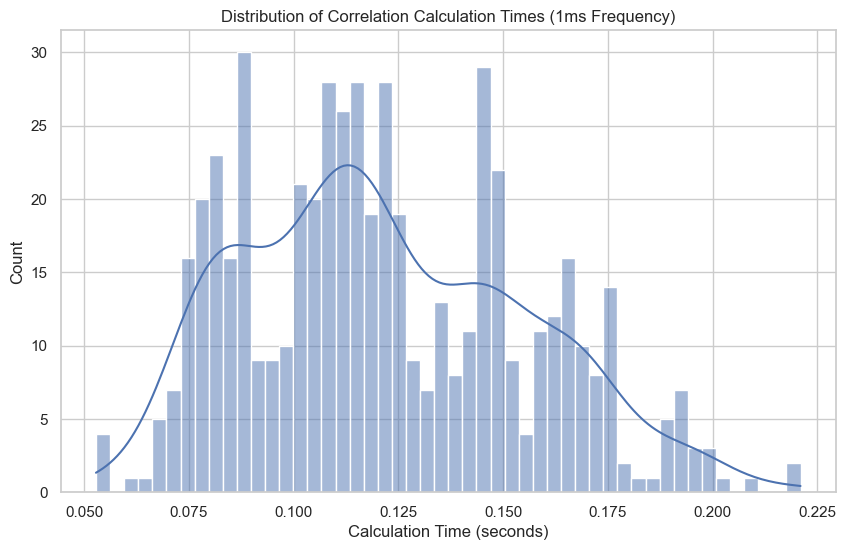

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['correlation_time_seconds'], bins=50, kde=True)
plt.title('Distribution of Correlation Calculation Times (1ms Frequency)')
plt.xlabel('Calculation Time (seconds)')
plt.ylabel('Count')
plt.show()

In [8]:
# Basic statistics
print("Statistics for filtered data:")
display(filtered_df['correlation_time_seconds'].describe())

In [ ]:
# Calculate detailed statistics
mean_time = filtered_df['correlation_time_seconds'].mean()
std_time = filtered_df['correlation_time_seconds'].std()
var_time = filtered_df['correlation_time_seconds'].var()

# 95% Confidence Interval (assuming normal distribution)
from scipy import stats
import numpy as np

ci = stats.norm.interval(0.95, loc=mean_time, scale=std_time)

print(f"Mean: {mean_time:.6f} s")
print(f"Variance: {var_time:.6f} s^2")
print(f"Std Dev: {std_time:.6f} s")
print(f"95% Confidence Interval: {ci}")

## 5. Analysis of Execution Time Drivers

Investigate the relationship between execution time and other factors like matrix size and frequency.

In [ ]:
# Correlation matrix for relevant columns
cols_to_check = ['correlation_time_seconds', 'len_corr_matrix', 'len1_raw', 'len2_raw']
corr_matrix = df_clean[cols_to_check].corr()
print("Correlation with Execution Time:")
display(corr_matrix['correlation_time_seconds'].sort_values(ascending=False))

In [ ]:
# Scatter plot: Time vs Matrix Size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='len_corr_matrix', y='correlation_time_seconds', hue='frequency')
plt.title('Correlation Time vs Matrix Size')
plt.xlabel('Length of Correlation Matrix')
plt.ylabel('Correlation Time (seconds)')
plt.show()

In [ ]:
# Box plot: Time vs Frequency
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='frequency', y='correlation_time_seconds')
plt.title('Correlation Time Distribution by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Correlation Time (seconds)')
plt.show()

## 6. Full Pearson Distribution

Distribution of correlation values for all Pearson calculations, ignoring frequency.

In [ ]:
# Filter for all Pearson correlations
pearson_all_df = df_clean[df_clean['correlation_method'] == 'pearson']

plt.figure(figsize=(10, 6))
sns.histplot(pearson_all_df['correlation_value'], bins=50, kde=True)
plt.title('Distribution of All Pearson Correlations (All Frequencies)')
plt.xlabel('Correlation Value')
plt.ylabel('Count')
plt.show()

## 7. Investigation of Zero Correlation Times

Investigate rows where `correlation_time_seconds` is 0 or very close to 0.

In [26]:
# Filter for zero time
zero_time_df = df_clean[df_clean['correlation_time_seconds'] == 0]
print(f"Rows with 0 correlation time: {len(zero_time_df)}")

if len(zero_time_df) > 0:
    print("\nSample of zero time rows:")
    display(zero_time_df.head())
    
    # Check matrix size for these rows
    print("\nMatrix size statistics for zero time rows:")
    display(zero_time_df['len_corr_matrix'].describe())
    
    # Check frequency distribution
    print("\nFrequency distribution for zero time rows:")
    print(zero_time_df['frequency'].value_counts())

Rows with 0 correlation time: 0
